# 1.0 IMPORTS

In [32]:
from sklearn import datasets as ds
from matplotlib import pyplot as plt
from sklearn import cluster as ct
from sklearn import metrics as mt
import numpy as np

# 2.0 Loading dataset

In [33]:
X, y= ds.make_blobs(
        n_samples = 100,
        n_features = 2,
        centers = 4,
        cluster_std = 0.2,
        #cluster_std = [0.2, 0.2, 0.8, 0.2],
        random_state = 0
        )

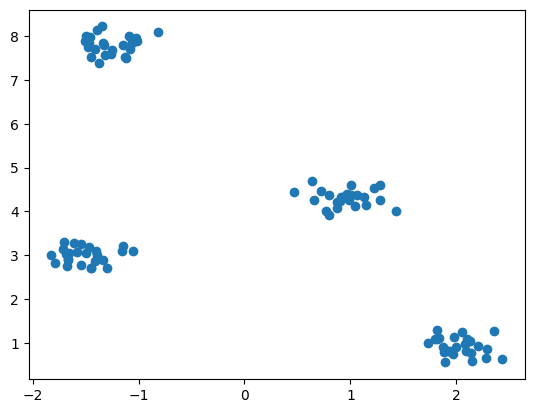

In [34]:
plt.scatter(X[:,0], X[:,1])

# 3.0 Training Model

In [35]:
n_clusters = 4

#definir o algoritmo
kmeans = ct.KMeans(
        n_clusters = n_clusters, #numero de clusters que achamos que tem
        init = 'random', # como é o processo de inicialização
        n_init = 10, #quantas vezes queremos que inicialize
        random_state = 0, #inicilize eles sempre a partir da mesma origem aleatória
        )

# fit - training
labels = kmeans.fit_predict(X)

#perfomance (test)
silhouette_avg = mt.silhouette_score(X, labels)

print('Para n_clusters : {} | AVG silhouette : {}'.format(n_clusters, silhouette_avg))

Para n_clusters : 4 | AVG silhouette : 0.8877551451876332


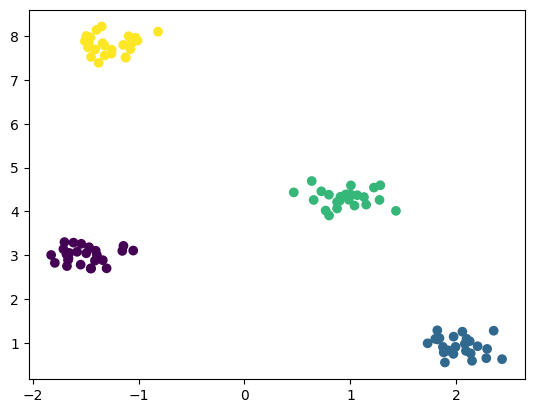

In [36]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

# 4.0 Fine Tunning

In [37]:
np.arange(2, 11, 1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [38]:
n_clusters = np.arange (2, 11, 1)
ss_list = []

for c in n_clusters:

    #definir o algoritmo
    kmeans = ct.KMeans(n_clusters = c, #numero de clusters que achamos que tem
                    init = 'random', # como é o processo de inicialização
                    n_init = 10, #quantas vezes queremos que inicialize
                    random_state = 0 #inicilize eles sempre a partir da mesma origem aleatória
            )

    # fit - training
    labels = kmeans.fit_predict(X)

    #perfomance (test)
    ss_avg = mt.silhouette_score(X, labels)
    ss_list.append(ss_avg)

    print('Para n_clusters : {} | AVG silhouette : {}'.format(c, ss_avg))

Para n_clusters : 2 | AVG silhouette : 0.6301533356400746
Para n_clusters : 3 | AVG silhouette : 0.7446117253423217
Para n_clusters : 4 | AVG silhouette : 0.8877551451876332
Para n_clusters : 5 | AVG silhouette : 0.749445213898992
Para n_clusters : 6 | AVG silhouette : 0.5987300721165131
Para n_clusters : 7 | AVG silhouette : 0.4568675319876354
Para n_clusters : 8 | AVG silhouette : 0.4862682155094881
Para n_clusters : 9 | AVG silhouette : 0.34299624189905065
Para n_clusters : 10 | AVG silhouette : 0.3561834879825586


Text(0, 0.5, 'Silhouette Score Average')

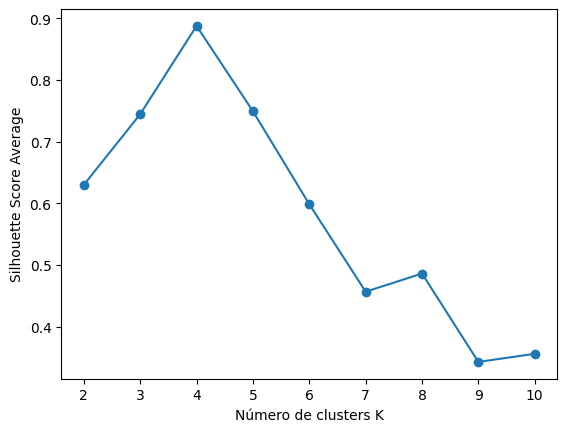

In [39]:
plt.plot(n_clusters, ss_list, marker = 'o')
plt.xlabel('Número de clusters K')
plt.ylabel('Silhouette Score Average')

# 5.0 Algoritmo em Produção

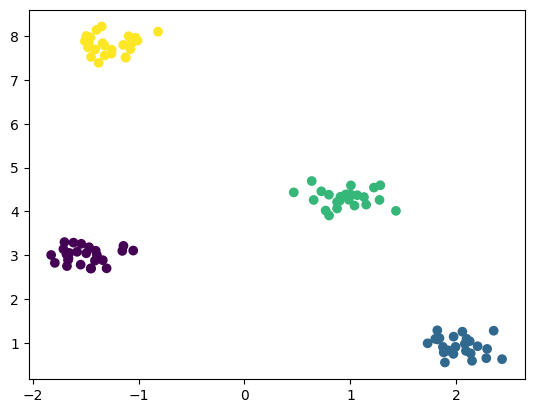

In [40]:
c= 4 

#definir o algoritmo
kmeans = ct.KMeans(n_clusters = c, #numero de clusters que achamos que tem
                init = 'random', # como é o processo de inicialização
                n_init = 10, #quantas vezes queremos que inicialize
                random_state = 0 #inicilize eles sempre a partir da mesma origem aleatória
        )

# fit - training
labels = kmeans.fit_predict(X)

#perfomance (test)
ss_avg = mt.silhouette_score(X, labels)

plt.scatter(X[:,0], X[:,1], c=labels)